# Forecast Hydroloelectrical power energy using LSTM architecture

## introduction and access to data

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot as aplot

import numpy as np
import pandas as pd

from datetime import datetime as dt
from IPython.display import Image, HTML
import pandas as pd
from datetime import datetime

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from pandas.plotting import autocorrelation_plot

from sklearn.metrics import r2_score
import sklearn.metrics as metrics

from arcgis.gis import GIS
from arcgis.learn import TimeSeriesModel, prepare_tabulardata
from arcgis.features import FeatureLayer, FeatureLayerCollection

## Login ArcGIS online

In [2]:
# Prompt user to provide username and password
import getpass
username = input('Enter username: ')
password = getpass.getpass("Enter your password: ") 
gis = GIS("https://udistritalfjc.maps.arcgis.com/home", username, password)

Enter username: Camendezv_UDFJC
Enter your password: ········


In [3]:
#import tables from ArcGIS online
## Capivara hydroelectric power station
Table1_HPP = gis.content.search("title:HPPCapivara* owner:camendezv_UDFJC")[0]
## Chavantes hydroelectric power station
Table2_HPP = gis.content.search("title:HPPChavantes* owner:camendezv_UDFJC")[1]
## Jurumirim hydroelectric power station
Table3_HPP = gis.content.search("title:HPPJurumirim* owner:camendezv_UDFJC")[1]

In [4]:
# Capivara
Data_Capivara = Table1_HPP.tables[0]
Series_Capivara_df = Data_Capivara.query().sdf
# Chavantes
Data_Chavantes = Table2_HPP.tables[0]
Series_Chavantes_df = Data_Chavantes.query().sdf
# Jurumirim
Data_Jurumirim = Table3_HPP.tables[0]
Series_Jurumirim_df = Data_Jurumirim.query().sdf     

## Convert data into time series

In [5]:
Series_Capivara_df = Series_Capivara_df.drop(["OBJECTID", "UsefulVolume", "UsefulVolumePercent", "StoredEnergy", "EnergyGeneration"], axis=1)
Series_Chavantes_df = Series_Chavantes_df.drop(["OBJECTID", "UsefulVolume", "UsefulVolumePercent", "StoredEnergy", "EnergyGeneration"], axis=1)
Series_Jurumirim_df = Series_Jurumirim_df.drop(["OBJECTID", "UsefulVolume", "UsefulVolumePercent", "StoredEnergy", "EnergyGeneration"], axis=1)
     
Series_Capivara_df['AffluentFlow'] = Series_Capivara_df['AffluentFlow'].astype('float64')
Series_Capivara_df['DefluentFlow'] = Series_Capivara_df['DefluentFlow'].astype('float64')
Series_Capivara_df['NaturalFlow'] = Series_Capivara_df['NaturalFlow'].astype('float64')
Series_Capivara_df['AffluentNaturalEnergy'] = Series_Capivara_df['AffluentNaturalEnergy'].astype('float64')

Series_Chavantes_df['AffluentFlow'] = Series_Chavantes_df['AffluentFlow'].astype('float64')
Series_Chavantes_df['DefluentFlow'] = Series_Chavantes_df['DefluentFlow'].astype('float64')
Series_Chavantes_df['NaturalFlow'] = Series_Chavantes_df['NaturalFlow'].astype('float64')
Series_Chavantes_df['AffluentNaturalEnergy'] = Series_Chavantes_df['AffluentNaturalEnergy'].astype('float64')

Series_Jurumirim_df['AffluentFlow'] = Series_Jurumirim_df['AffluentFlow'].astype('float64')
Series_Jurumirim_df['DefluentFlow'] = Series_Jurumirim_df['DefluentFlow'].astype('float64')
Series_Jurumirim_df['NaturalFlow'] = Series_Jurumirim_df['NaturalFlow'].astype('float64')
Series_Jurumirim_df['AffluentNaturalEnergy'] = Series_Jurumirim_df['AffluentNaturalEnergy'].astype('float64')

## Train - Test split of timeseries dataset

### Creating dataset for validation

In [6]:
# Capivara
CapivaraPredict_df = Series_Capivara_df.copy()
CapivaraPredict_df.loc[CapivaraPredict_df["Date"] > "2019-12-31" , "AffluentNaturalEnergy"] = np.NaN

# Chavantes
ChavantesPredict_df = Series_Chavantes_df.copy()
ChavantesPredict_df.loc[ChavantesPredict_df["Date"] > "2019-12-31" , "AffluentNaturalEnergy"] = np.NaN

#Jurumirim
JurumirimPredict_df = Series_Jurumirim_df.copy()
JurumirimPredict_df.loc[JurumirimPredict_df["Date"] > "2019-12-31" , "AffluentNaturalEnergy"] = np.NaN

### Creating dataset for training

In [8]:
#Capivara
test_size = 1582
Train_capivara, test_capivara = train_test_split(Series_Capivara_df, test_size=test_size, shuffle=False)
#Chavantes
test_size = 1582
Train_chavantes, test_chavantes = train_test_split(Series_Chavantes_df, test_size=test_size, shuffle=False)
#Jurumirim
test_size = 1582
Train_jurumirim, test_jurumirim = train_test_split(Series_Jurumirim_df, test_size=test_size, shuffle=False)

## Time series model building

In [9]:
data_capivara = prepare_tabulardata(
    Train_capivara,
    variable_predict="AffluentNaturalEnergy",
    explanatory_variables=["AffluentFlow", "DefluentFlow", "NaturalFlow"],
    index_field="Date")

data_chavantes = prepare_tabulardata(
    Train_chavantes,
    variable_predict="AffluentNaturalEnergy",
    explanatory_variables=["AffluentFlow", "DefluentFlow", "NaturalFlow"],
    index_field="Date")

data_jurumirim = prepare_tabulardata(
    Train_jurumirim,
    variable_predict="AffluentNaturalEnergy",
    explanatory_variables=["AffluentFlow", "DefluentFlow", "NaturalFlow"],
    index_field="Date")     

C:\Users\57320\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\learn\models\_arcgis_model.py:461: UserWarning:

Cuda is not available

C:\Users\57320\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\learn\_utils\tabular_data.py:1871: UserWarning:

Dataframe is not spatial, Rasters and distance layers will not work

C:\Users\57320\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\learn\_utils\tabular_data.py:1871: UserWarning:

Dataframe is not spatial, Rasters and distance layers will not work

C:\Users\57320\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\learn\_utils\tabular_data.py:1871: UserWarning:

Dataframe is not spatial, Rasters and distance layers will not work



## Checking autocorrelation by hydroelectric power station

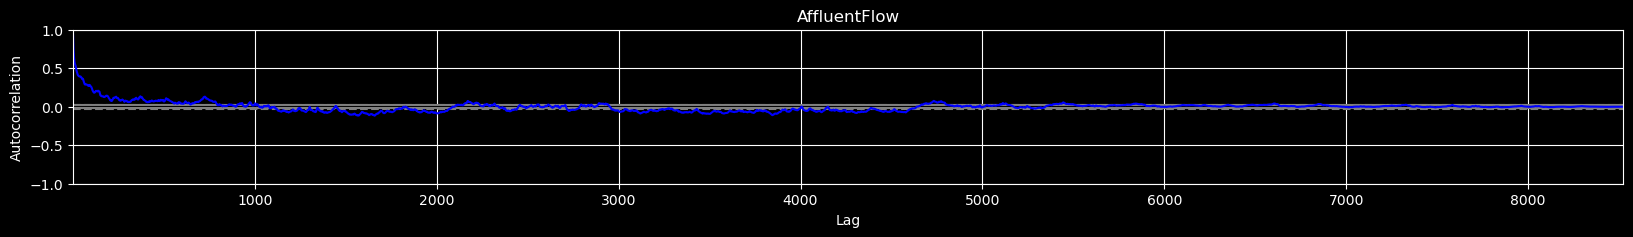

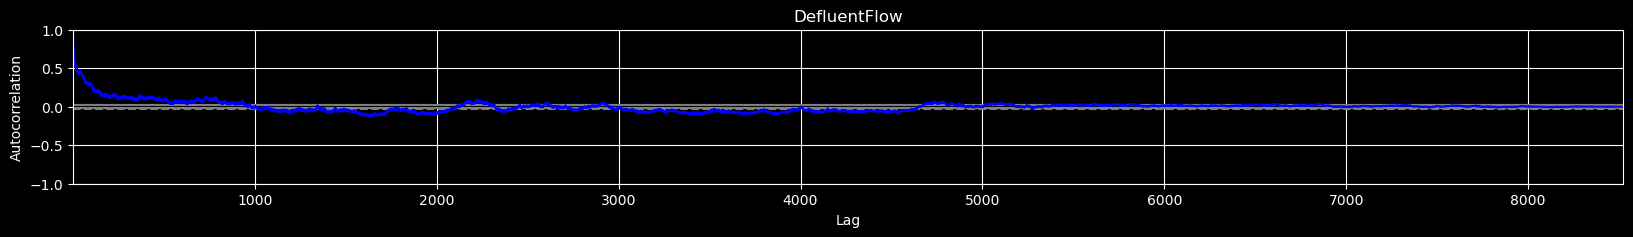

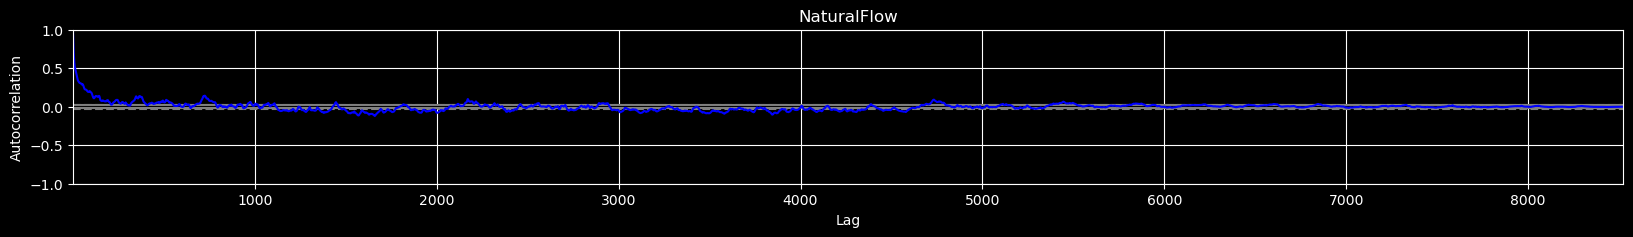

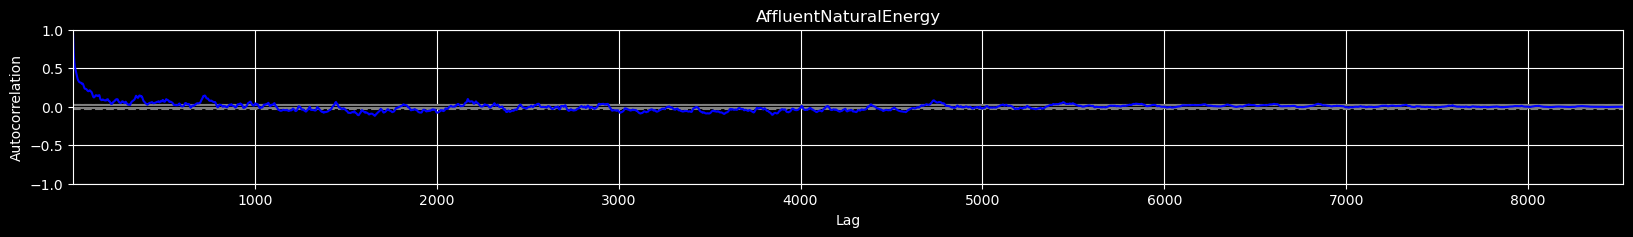

In [12]:
variables = ["AffluentFlow", "DefluentFlow", "NaturalFlow", "AffluentNaturalEnergy"]
for variable in variables:
    plt.figure(figsize=(20, 2))
    autocorr = aplot(Series_Capivara_df[variable], color="blue")
    plt.title(variable)

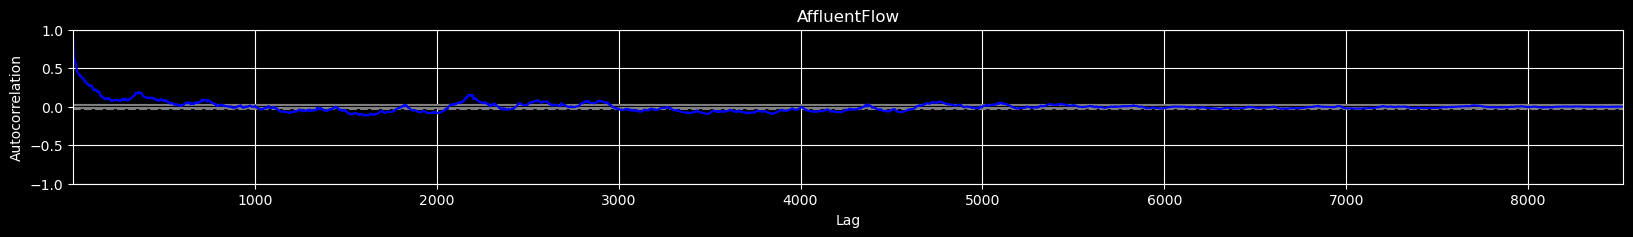

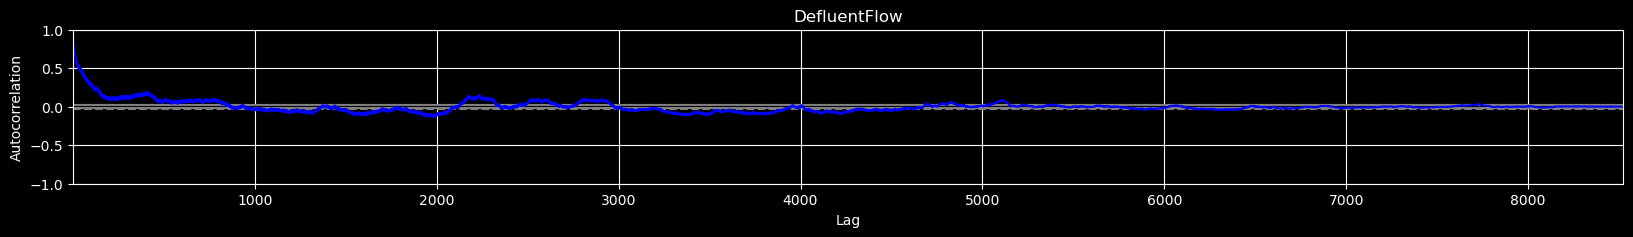

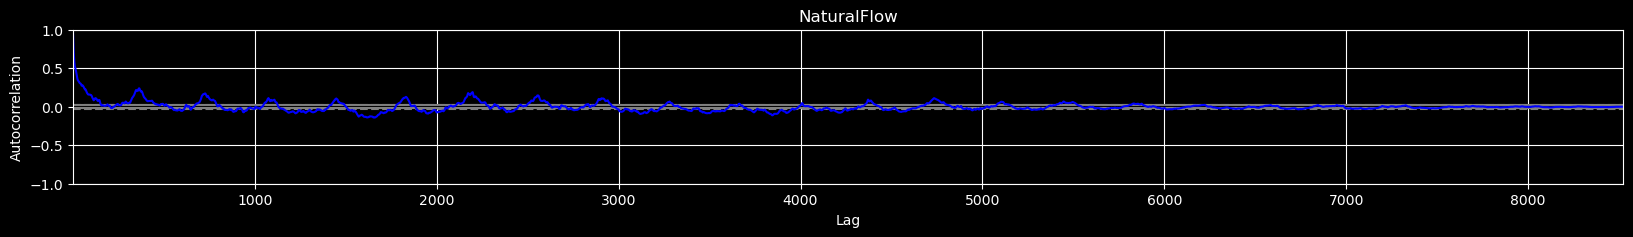

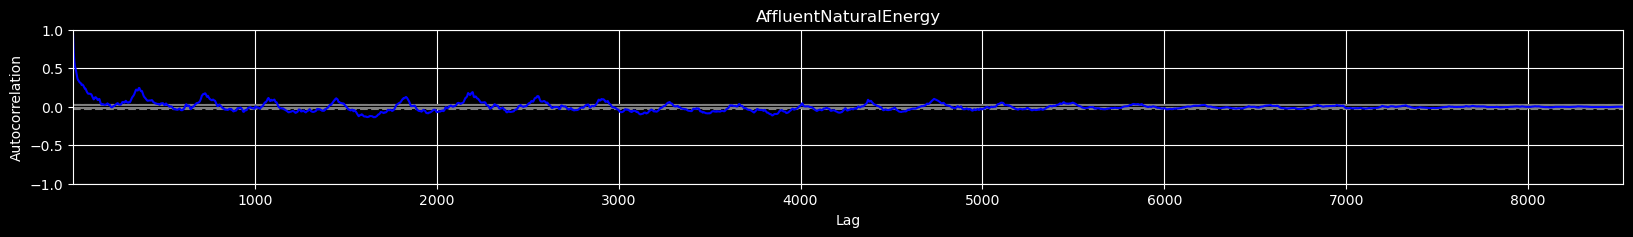

In [13]:
variables = ["AffluentFlow", "DefluentFlow", "NaturalFlow", "AffluentNaturalEnergy"]
for variable in variables:
    plt.figure(figsize=(20, 2))
    autocorr = aplot(Series_Chavantes_df[variable], color="blue")
    plt.title(variable)

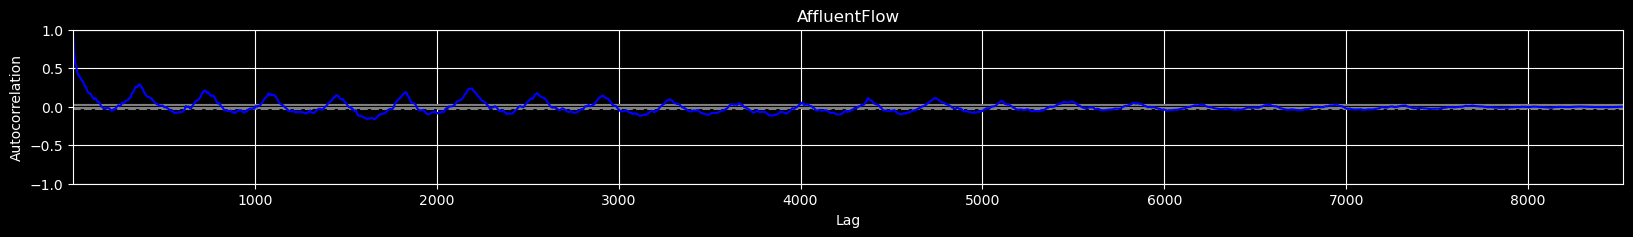

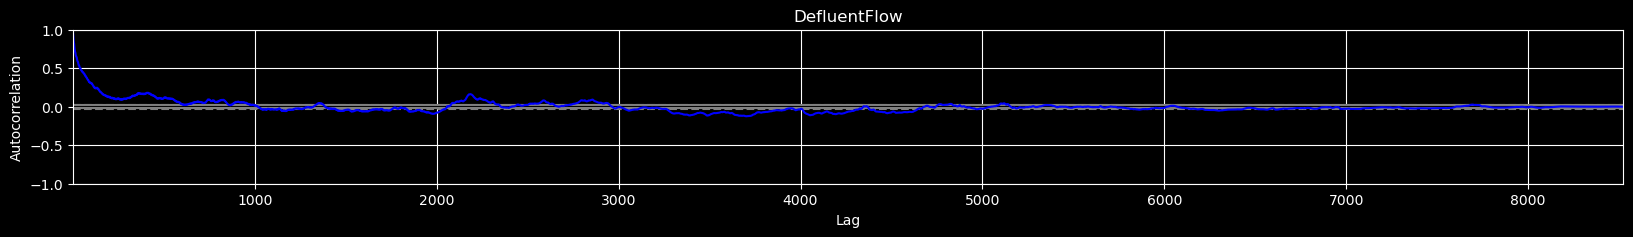

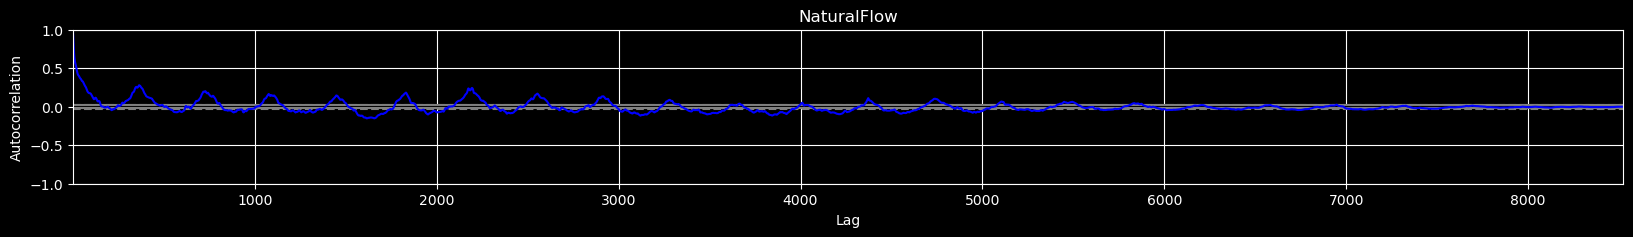

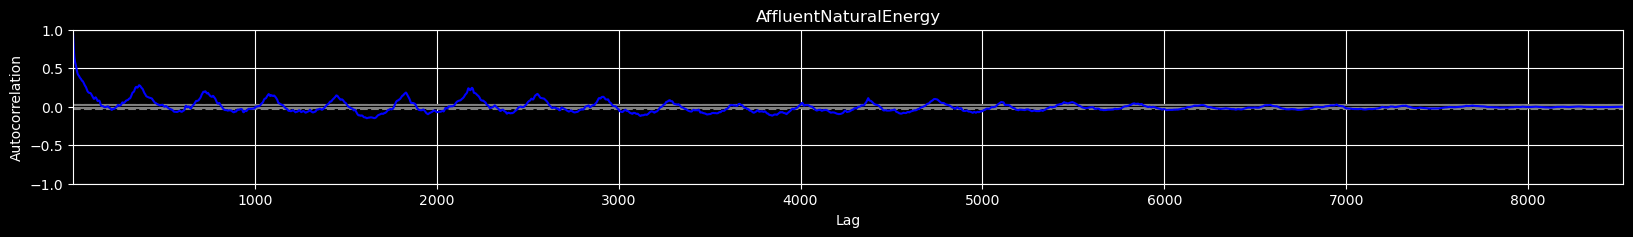

In [14]:
variables = ["AffluentFlow", "DefluentFlow", "NaturalFlow", "AffluentNaturalEnergy"]
for variable in variables:
    plt.figure(figsize=(20, 2))
    autocorr = aplot(Series_Jurumirim_df[variable], color="blue")
    plt.title(variable)

## Plot the time series by hydroelectric power station

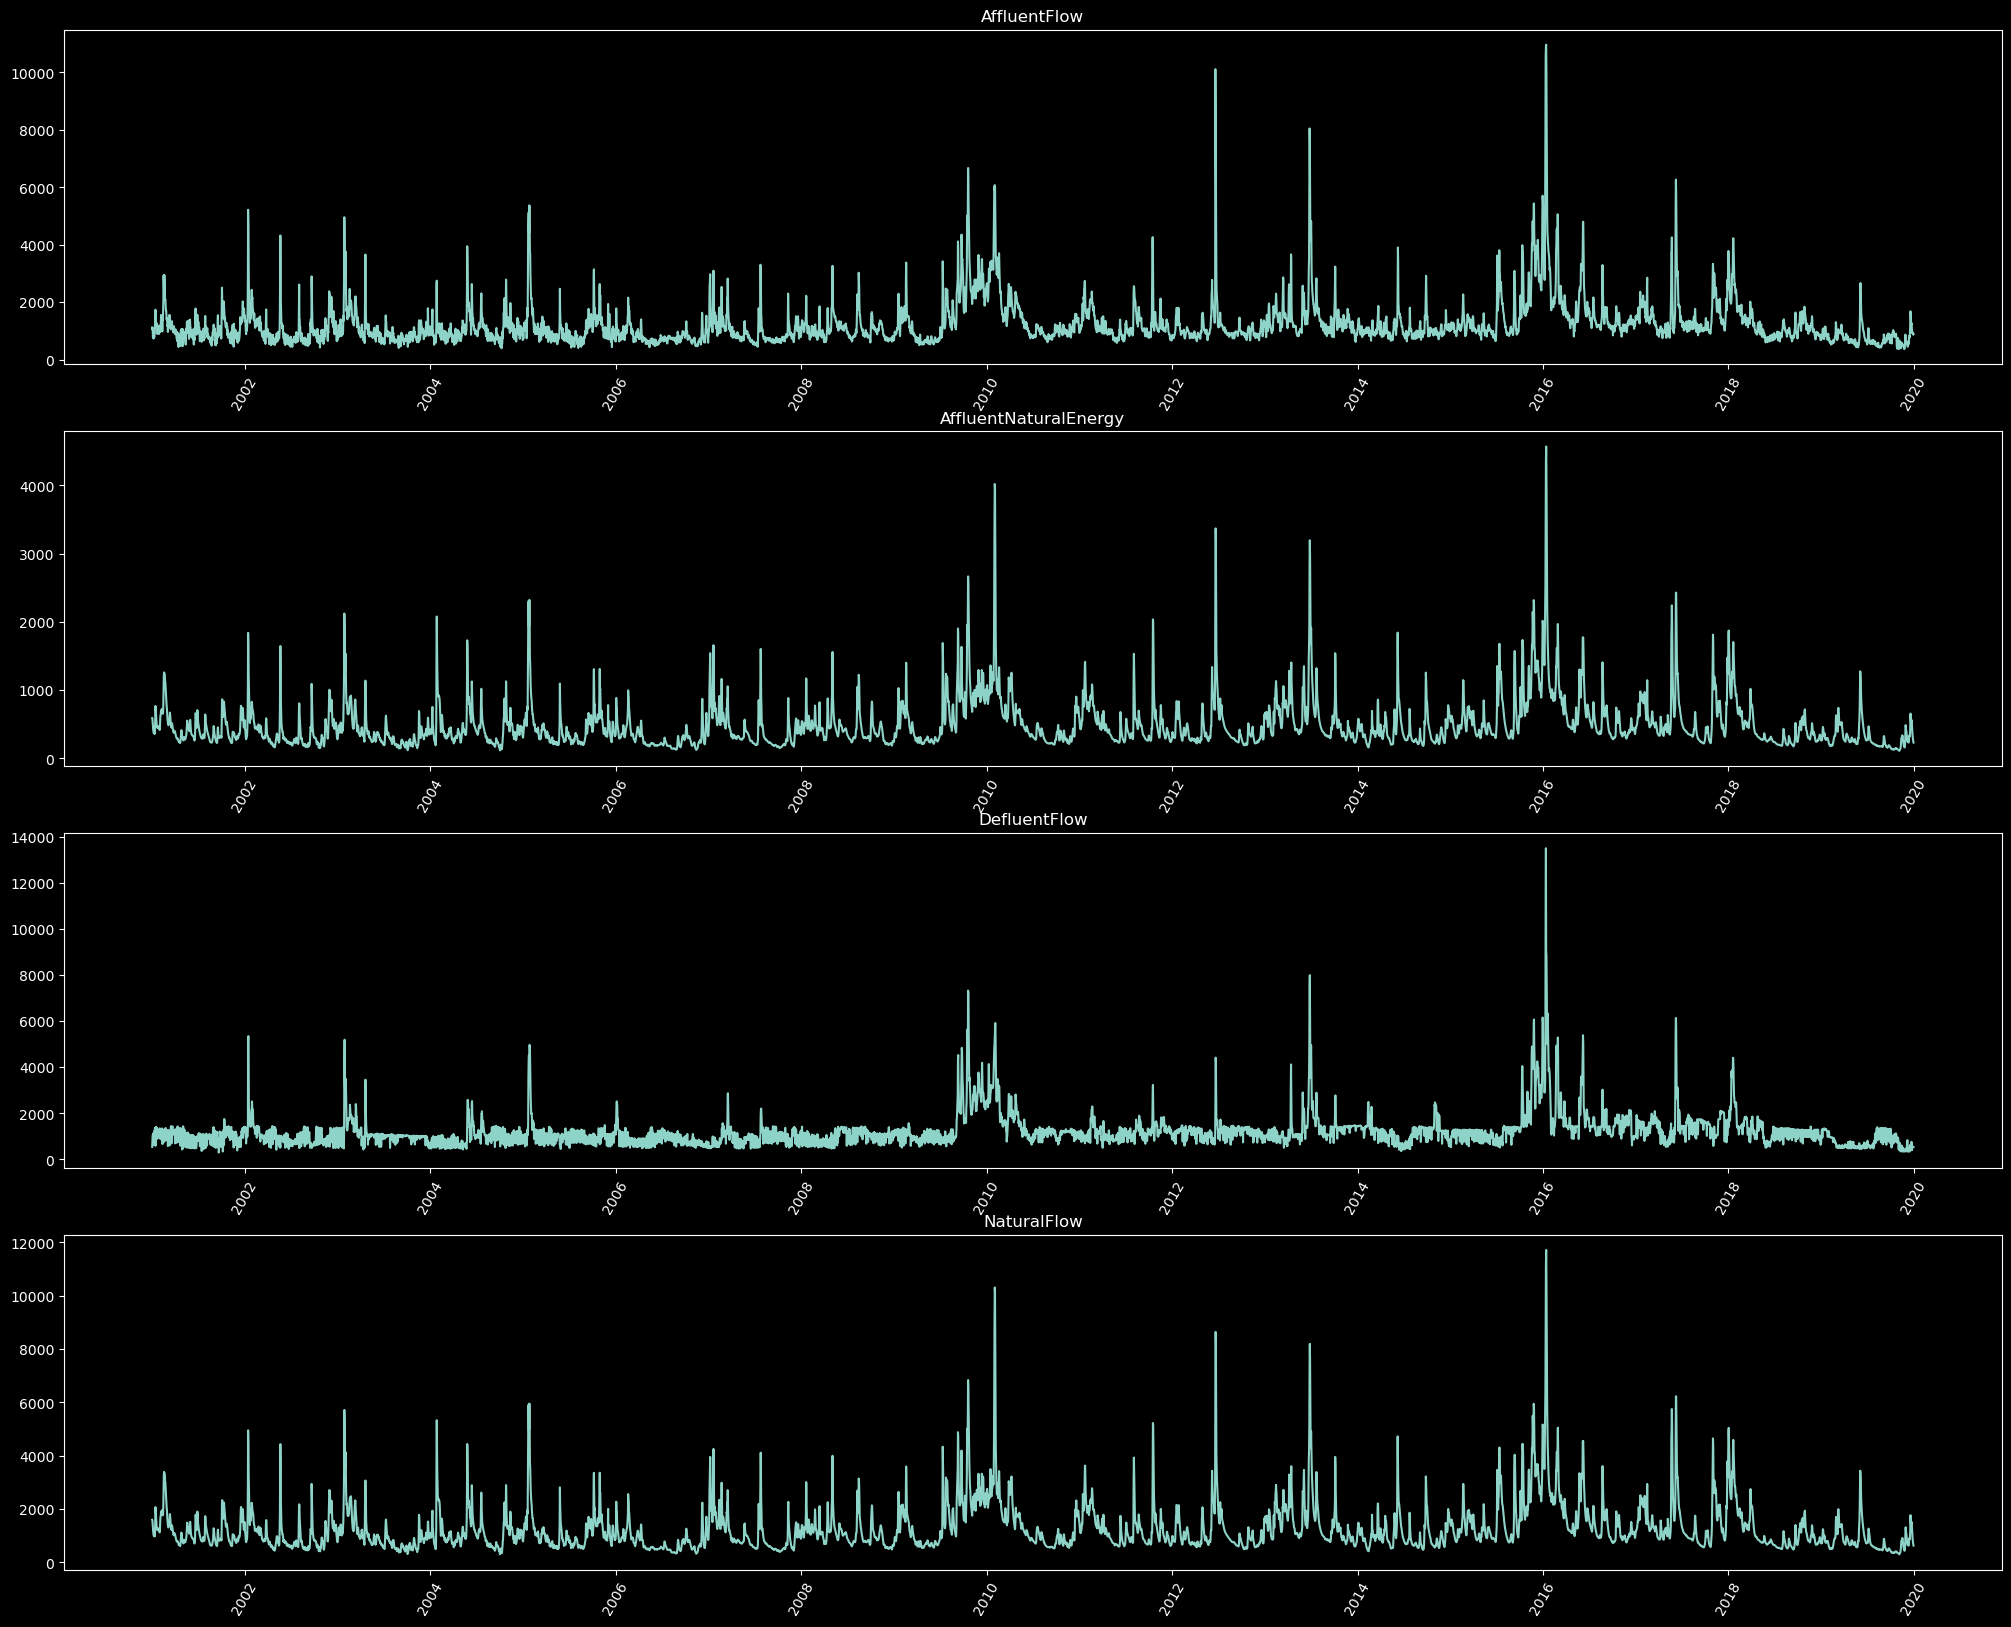

In [15]:
# Visualize the entire timeseries data
data_capivara.show_batch(graph=True)

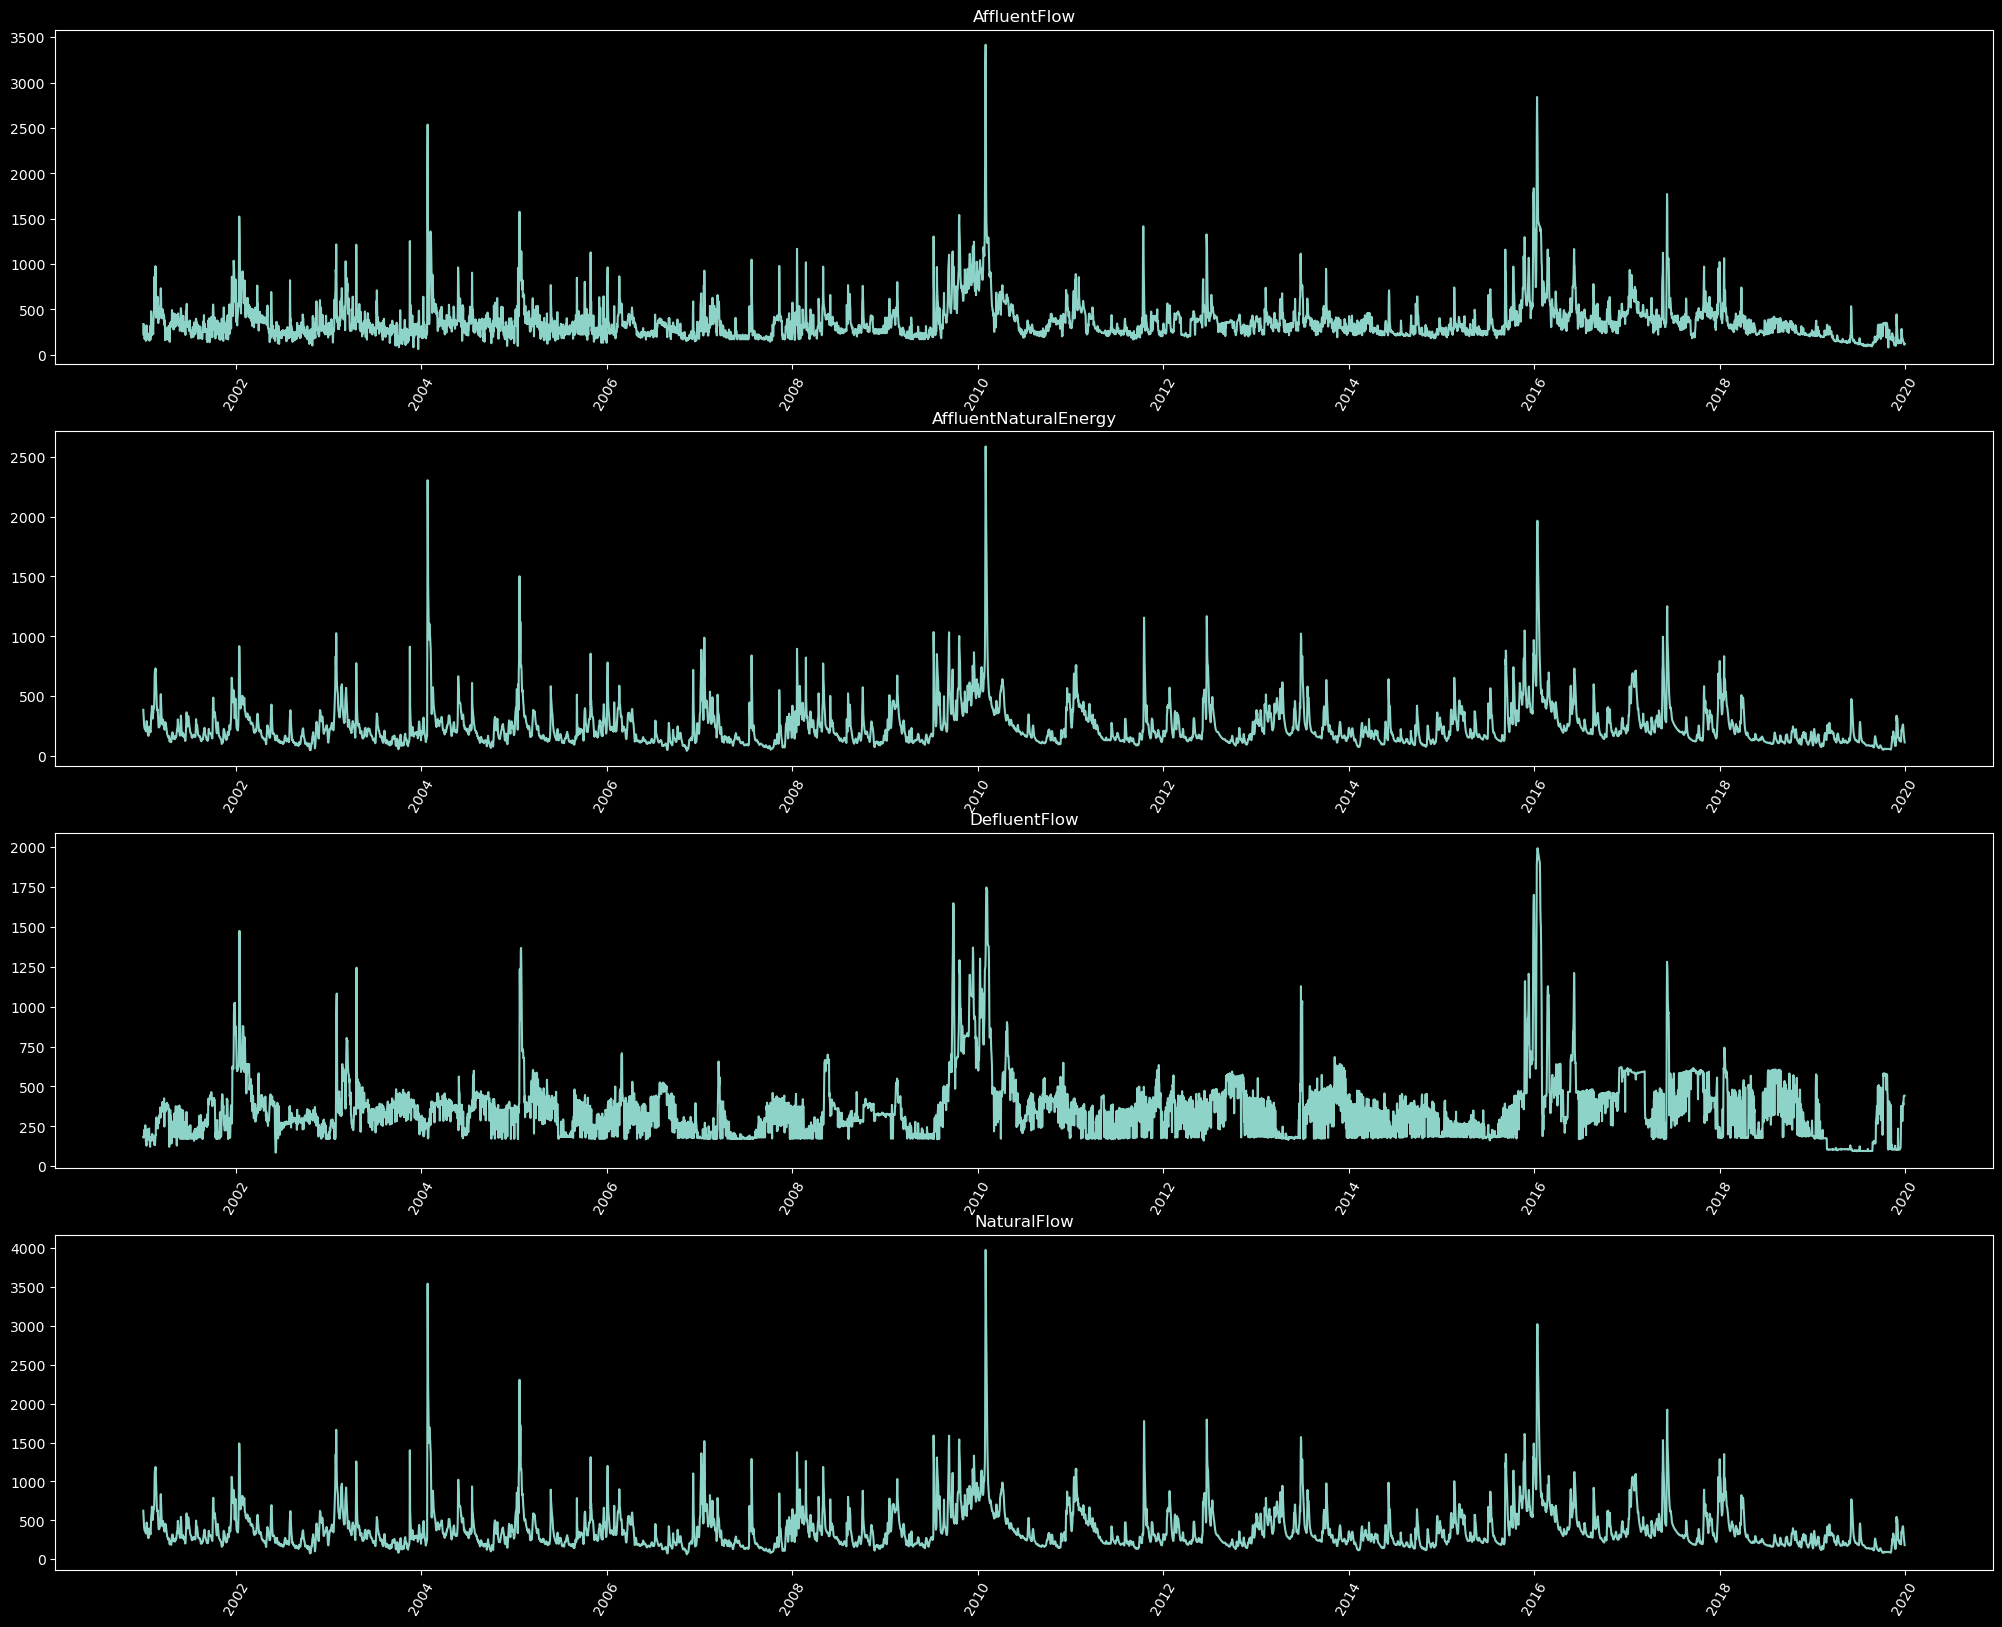

In [16]:
# Visualize the entire timeseries data
data_chavantes.show_batch(graph=True)

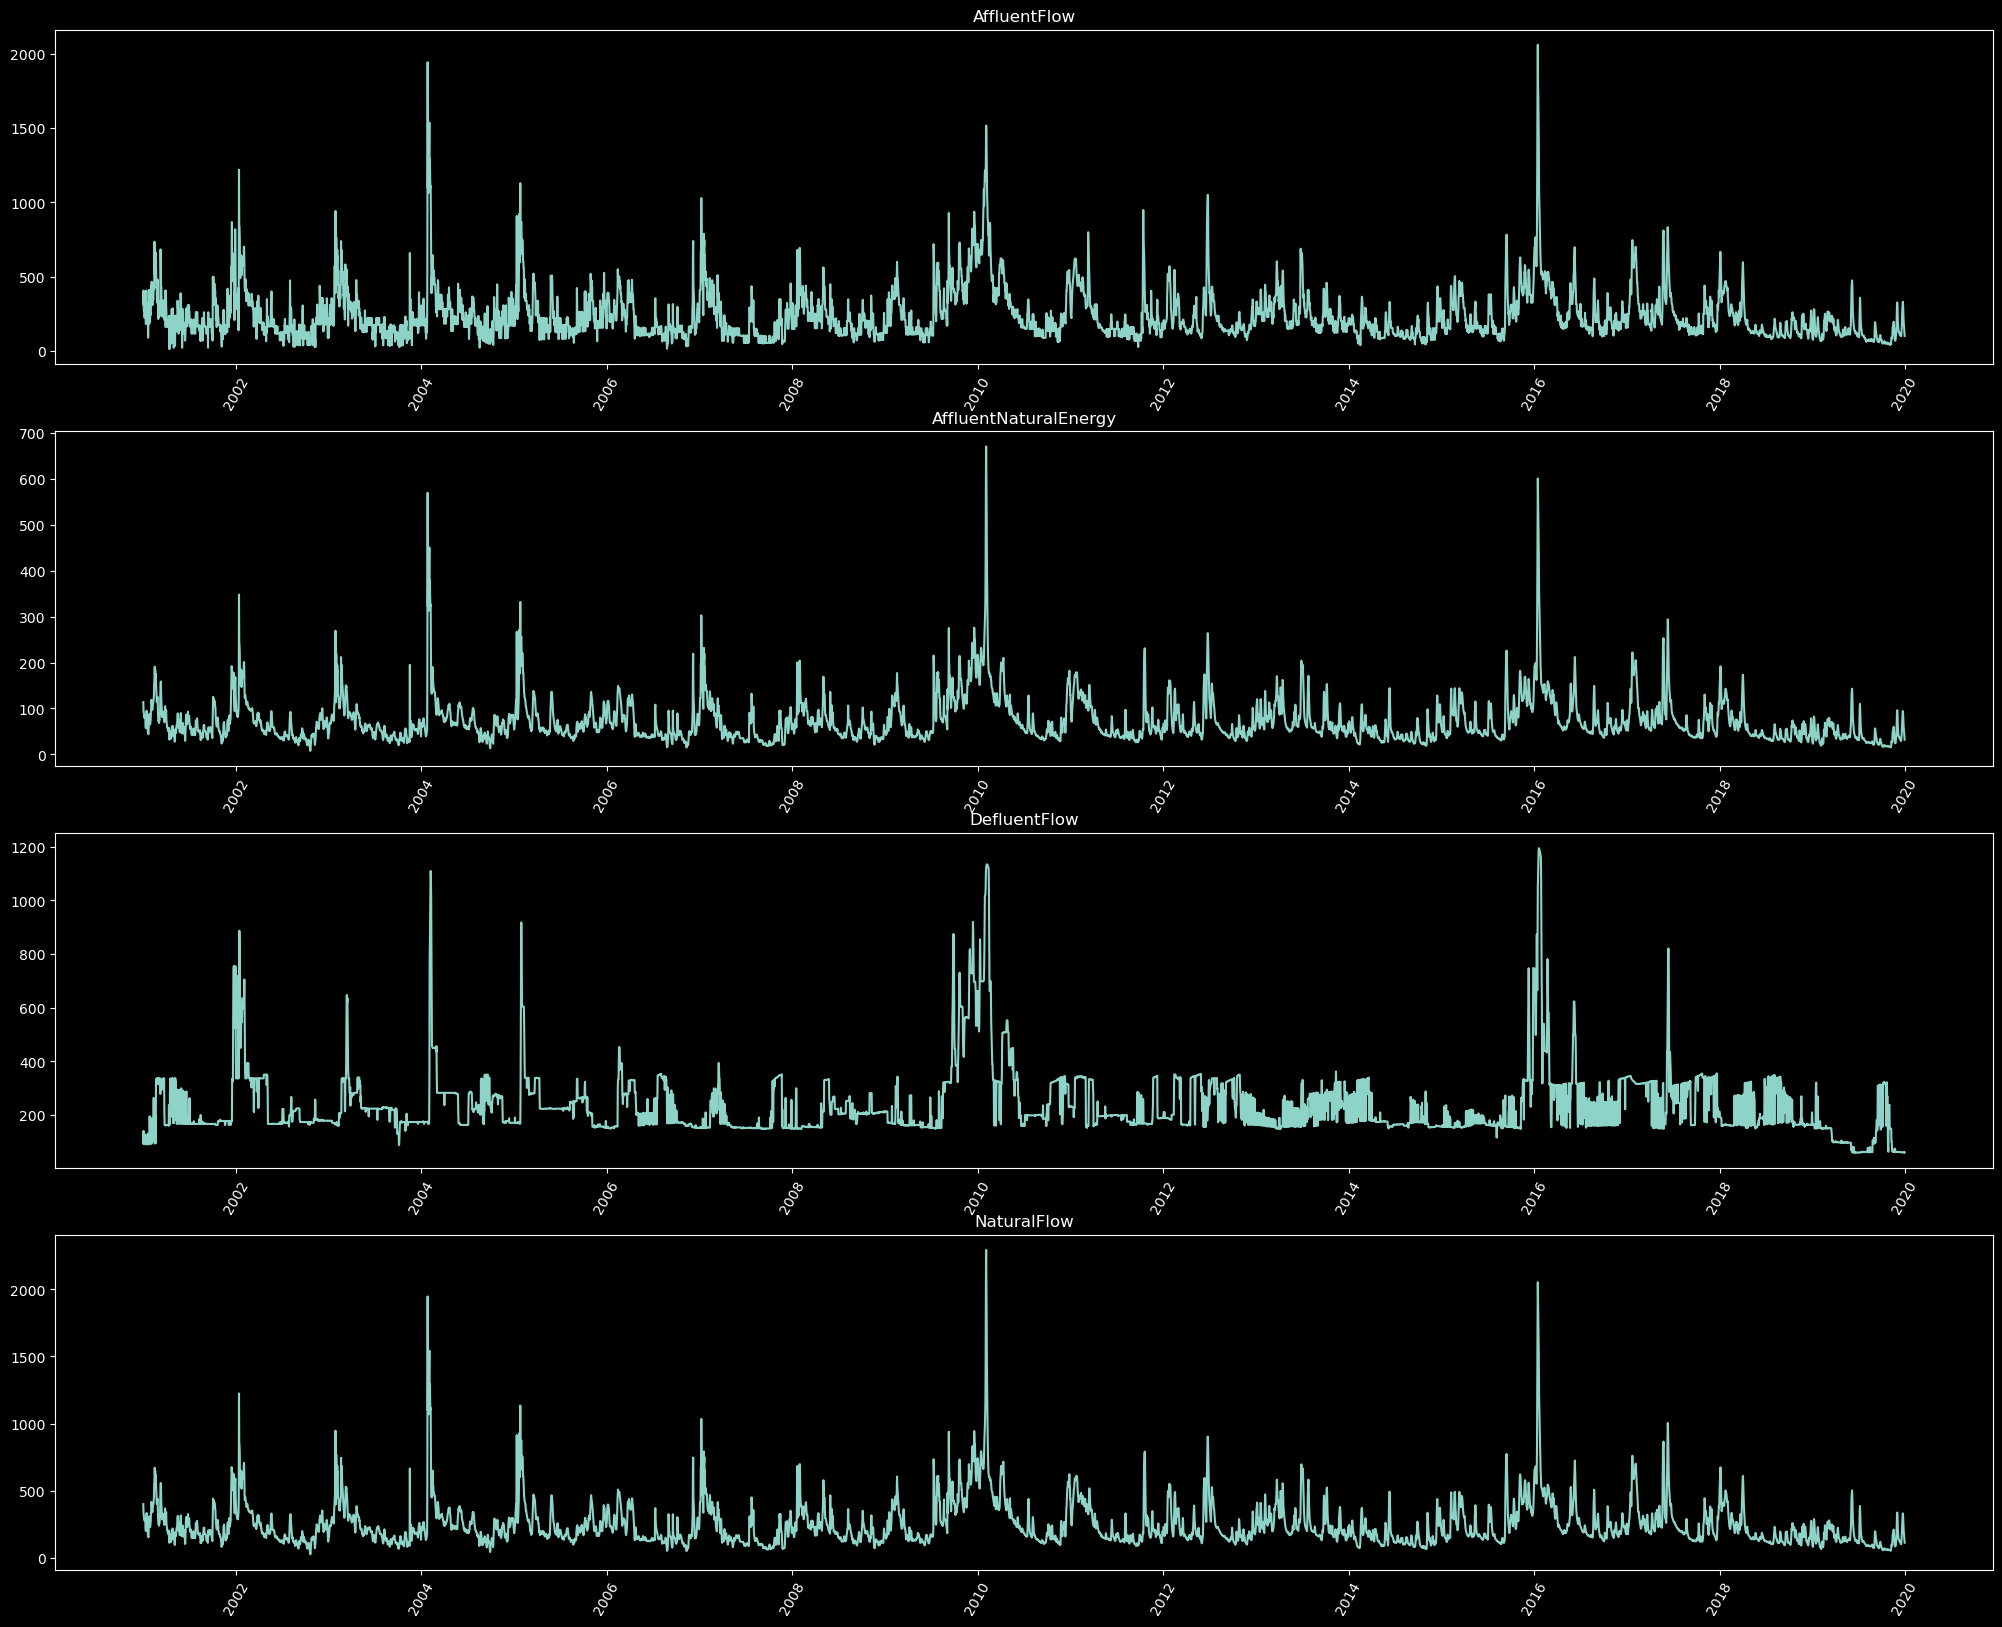

In [17]:
# Visualize the entire timeseries data
data_jurumirim.show_batch(graph=True)

## Compare the Affluent Flow, Stored Energy and Affluent Natural Energy

In [18]:
# Here sequence length is used as 12 which also indicates the seasonality of the data
seq_len = 365

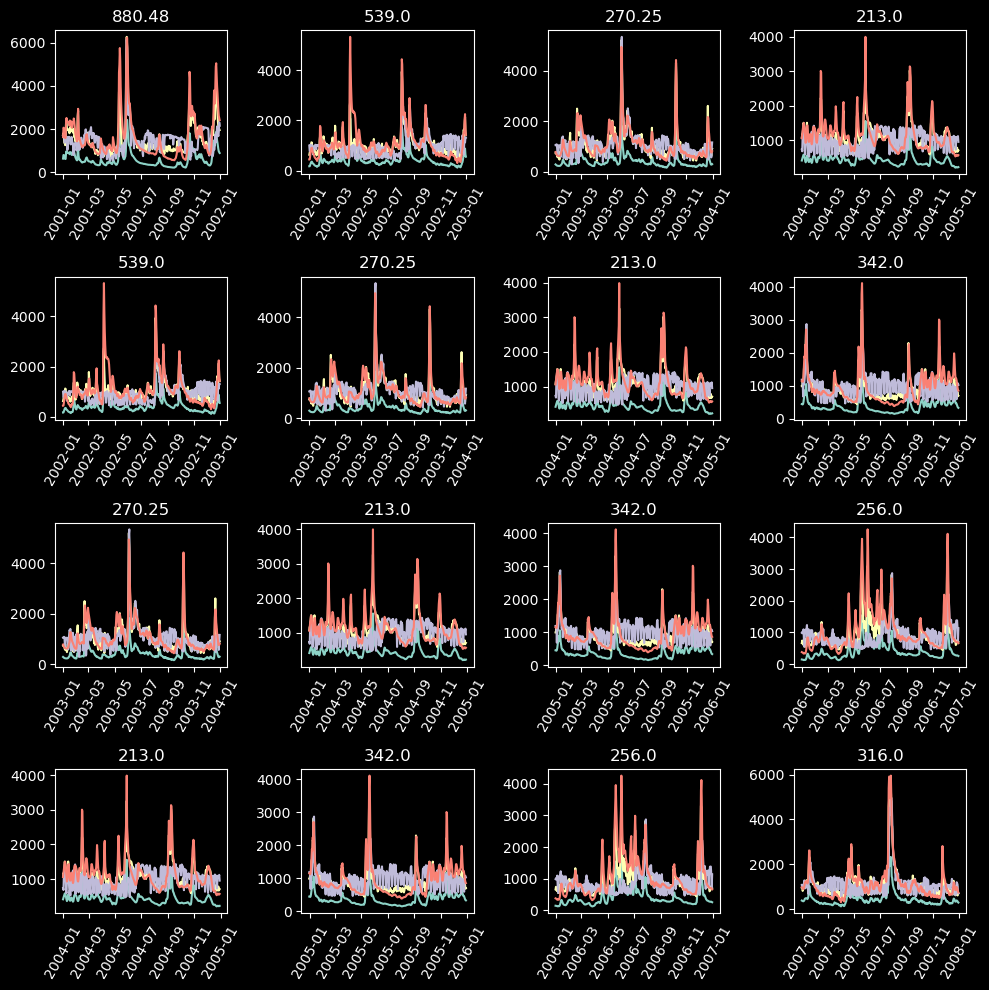

In [20]:
data_capivara.show_batch(rows=4, seq_len=seq_len)

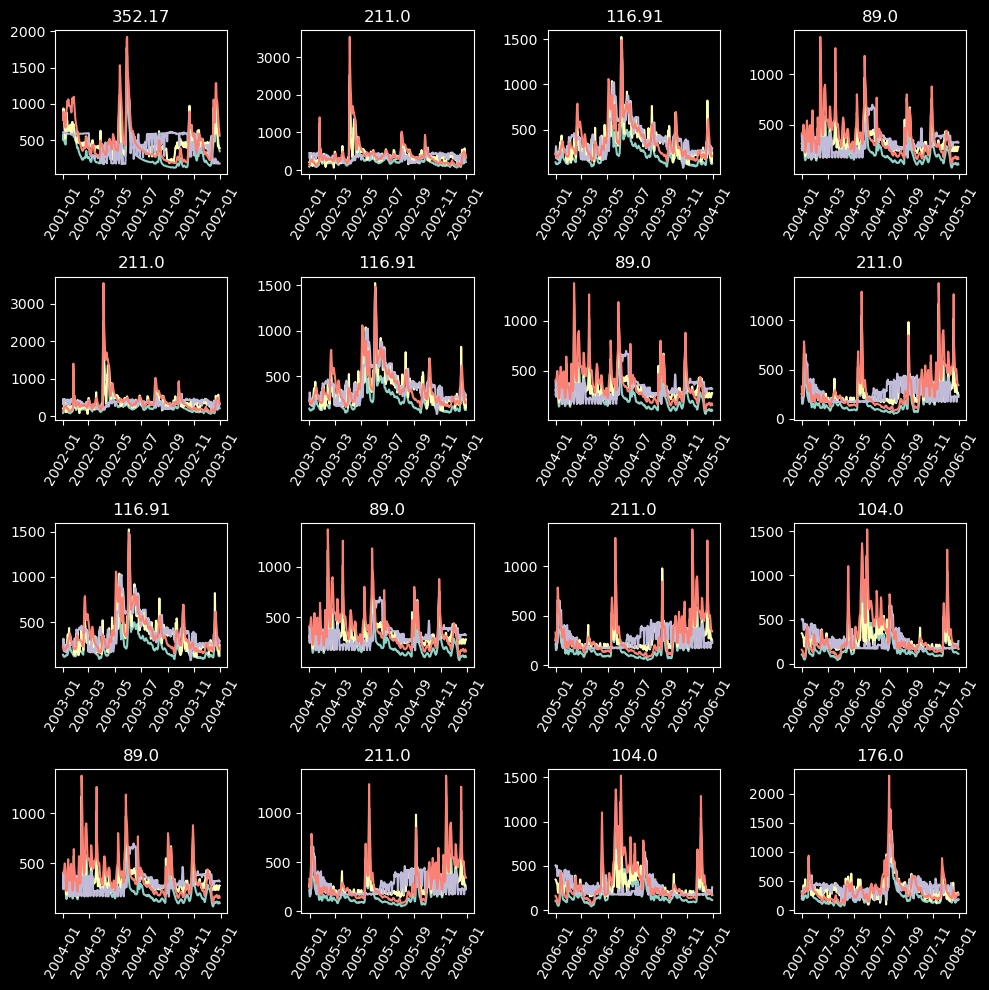

In [21]:
data_chavantes.show_batch(rows=4, seq_len=seq_len)

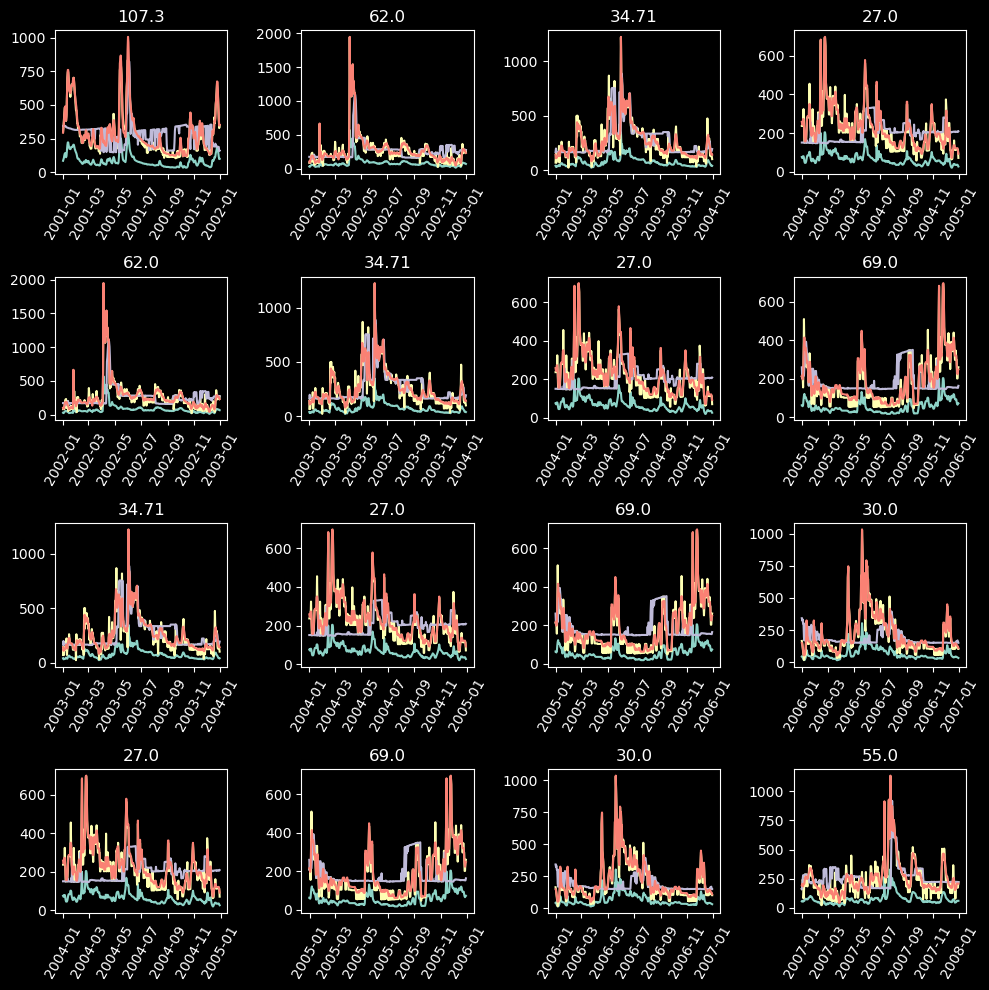

In [22]:
data_jurumirim.show_batch(rows=4, seq_len=seq_len)

## Model initialization

In [23]:
tsmodel_capivara = TimeSeriesModel(data_capivara, seq_len=seq_len, model_arch="ResCNN")
tsmodel_chavantes = TimeSeriesModel(data_chavantes, seq_len=seq_len, model_arch="ResCNN")
tsmodel_jurumirim = TimeSeriesModel(data_jurumirim, seq_len=seq_len, model_arch="ResCNN")

## Learning rate search

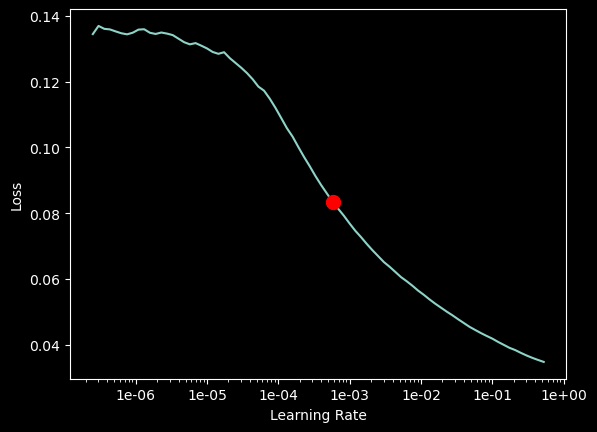

0.0005754399373371565

In [24]:
lr_rate_capivara = tsmodel_capivara.lr_find()
lr_rate_capivara

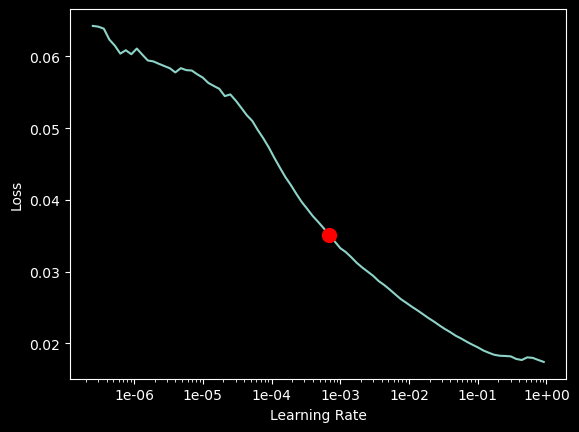

0.0006918309709189362

In [25]:
lr_rate_chavantes = tsmodel_chavantes.lr_find()
lr_rate_chavantes

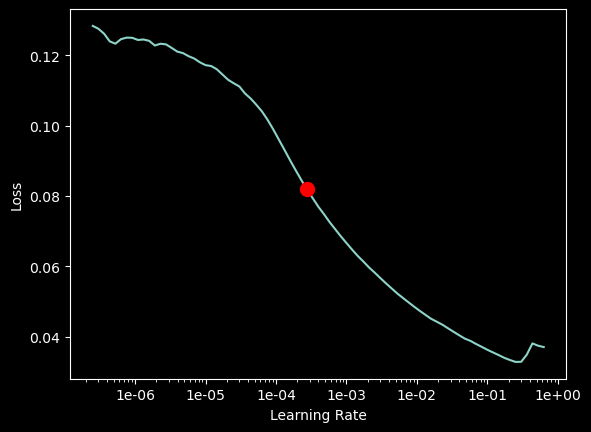

0.0002754228703338166

In [26]:
lr_rate_jurumirim = tsmodel_jurumirim.lr_find()
lr_rate_jurumirim

## Model training

In [27]:
tsmodel_capivara.fit(10, lr=lr_rate_capivara)

epoch     train_loss  valid_loss  time    
0         0.014179    0.005144    01:19     
1         0.005810    0.015798    01:22     
2         0.002636    0.003263    01:20     
3         0.001290    0.001042    01:21     
4         0.001053    0.000436    01:26     
5         0.000938    0.000463    01:27     
6         0.000731    0.000615    01:28     
7         0.000615    0.000320    01:29     
8         0.000469    0.000315    01:34     
9         0.000424    0.000273    01:59     


C:\Users\57320\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\fastai\sixel.py:16: UserWarning:

You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel



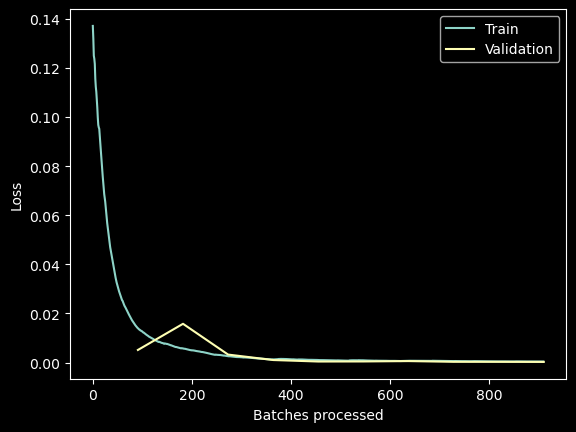

In [29]:
tsmodel_capivara.plot_losses()

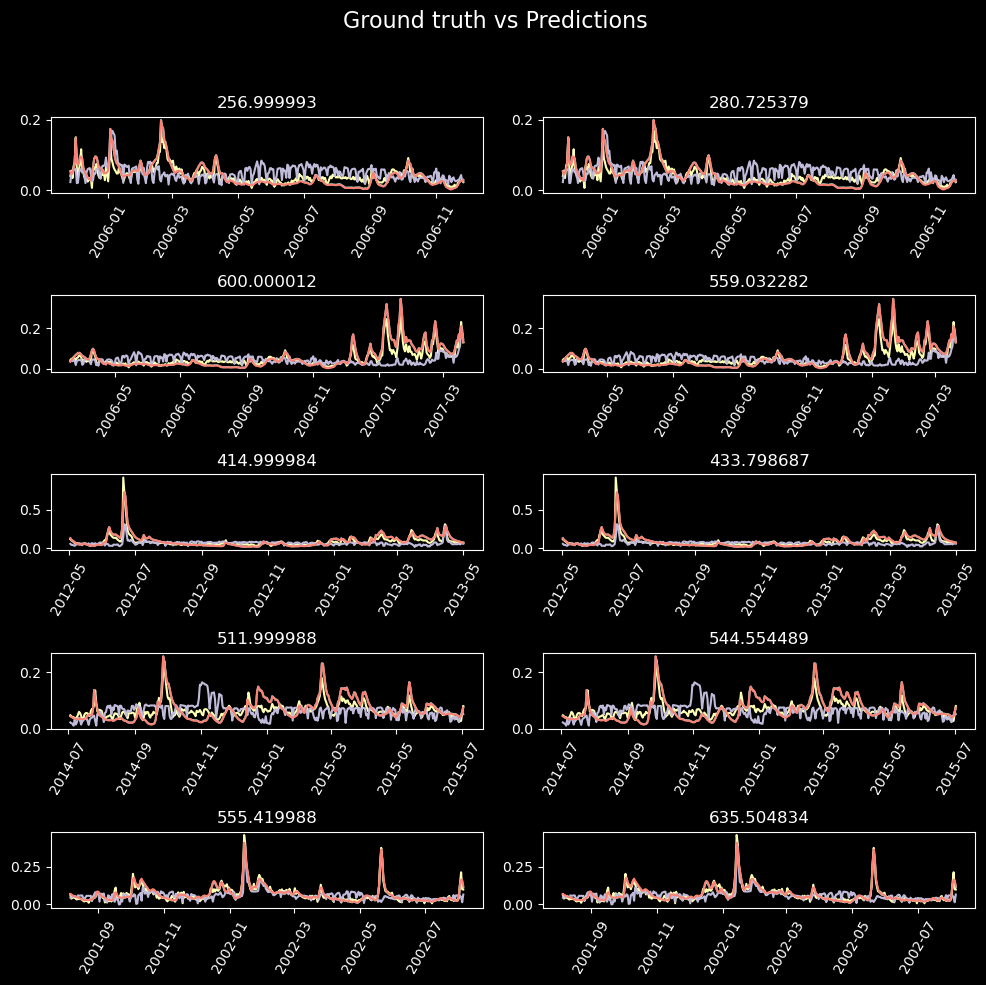

In [30]:
tsmodel_capivara.show_results(rows=5)

In [31]:
tsmodel_chavantes.fit(10, lr=lr_rate_chavantes)

epoch     train_loss  valid_loss  time    
0         0.007006    0.007677    01:25     
1         0.004284    0.006062    01:55     
2         0.002594    0.002575    01:52     
3         0.001422    0.000982    02:11     
4         0.000901    0.000917    02:44     
5         0.000867    0.000393    02:10     
6         0.000720    0.000404    02:25     
7         0.000599    0.000395    02:14     
8         0.000547    0.000287    02:57     
9         0.000497    0.000279    02:15     


C:\Users\57320\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\fastai\sixel.py:16: UserWarning:

You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel



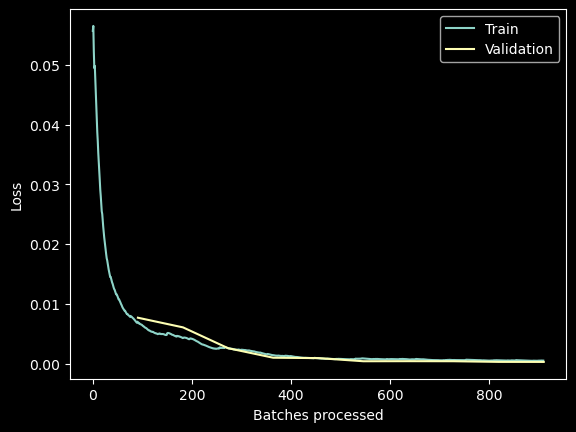

In [32]:
tsmodel_chavantes.plot_losses()

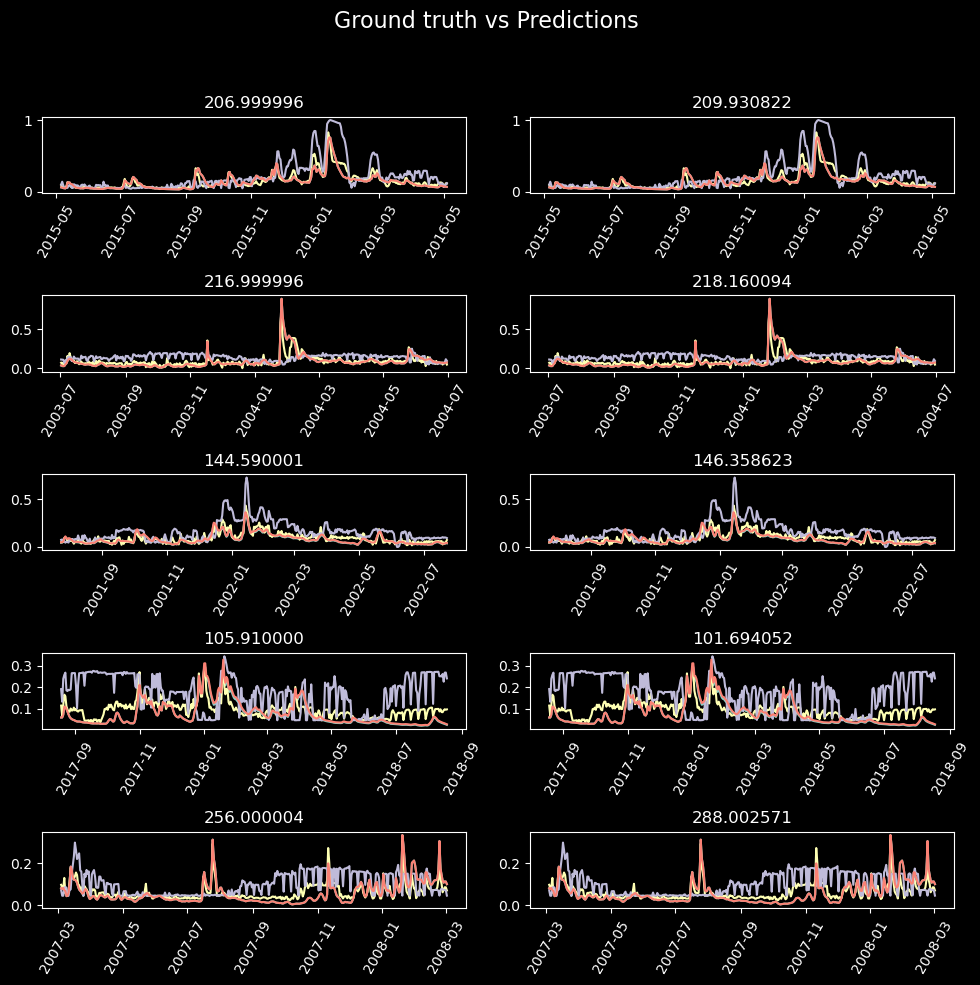

In [33]:
tsmodel_chavantes.show_results(rows=5)

In [34]:
tsmodel_jurumirim.fit(10, lr=lr_rate_jurumirim)

epoch     train_loss  valid_loss  time    
0         0.018642    0.005207    02:24     
1         0.005913    0.002561    02:07     
2         0.002827    0.000842    01:59     
3         0.001661    0.001658    02:07     
4         0.001416    0.004901    02:03     
5         0.001122    0.002245    01:59     
6         0.000939    0.001247    02:09     
7         0.000818    0.000428    01:53     
8         0.000664    0.000449    02:00     
9         0.000595    0.000387    02:02     


C:\Users\57320\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\fastai\sixel.py:16: UserWarning:

You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel



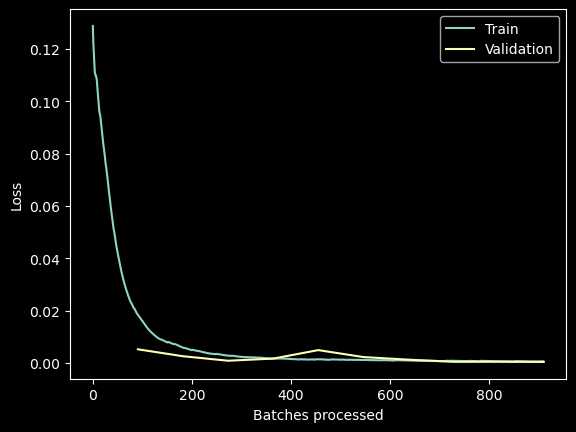

In [35]:
tsmodel_jurumirim.plot_losses()

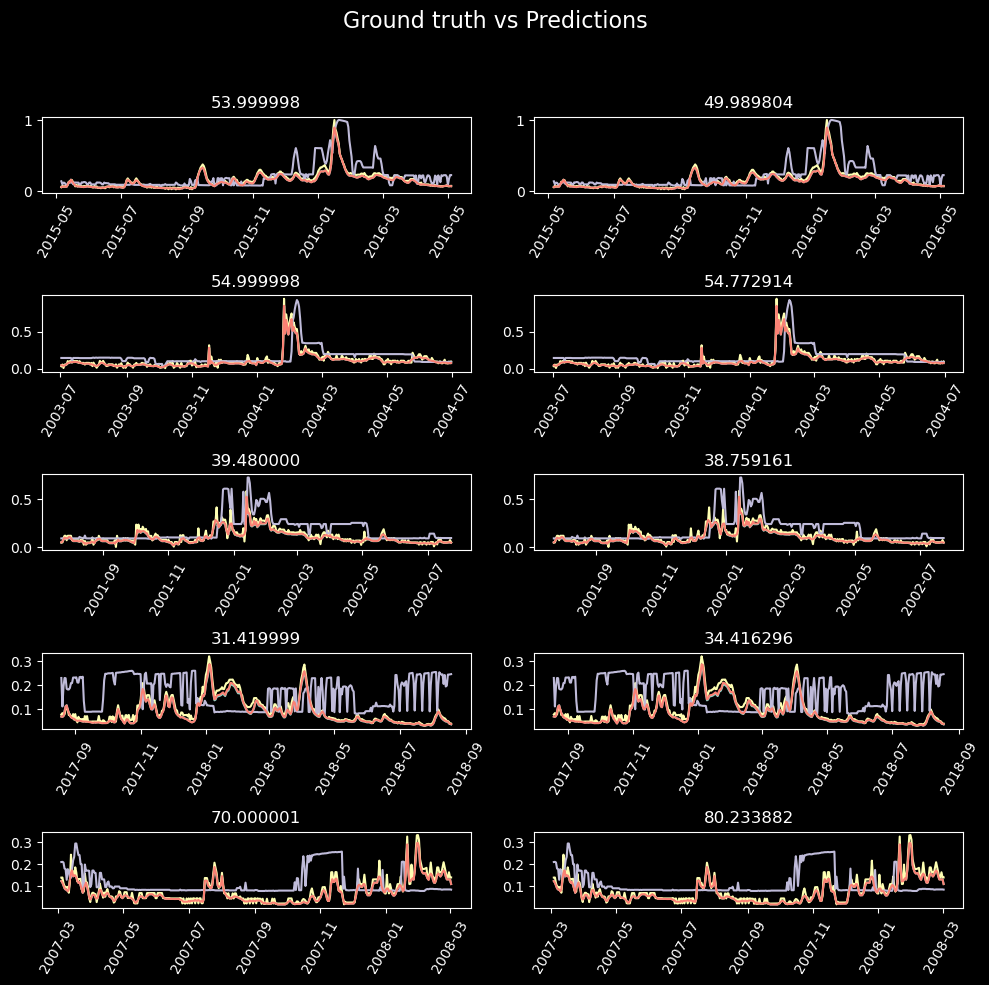

In [36]:
tsmodel_jurumirim.show_results(rows=5)

In [44]:
sdf_forecasted_univar_capivara = tsmodel_capivara.predict(Train_capivara, prediction_type='dataframe') 
sdf_forecasted_univar_chavantes = tsmodel_chavantes.predict(Train_chavantes, prediction_type='dataframe')
sdf_forecasted_univar_jurumirim = tsmodel_jurumirim.predict(Train_jurumirim, prediction_type='dataframe')

In [47]:
print(sdf_forecasted_univar_capivara)
print(sdf_forecasted_univar_chavantes)
print(sdf_forecasted_univar_jurumirim)

      AffluentFlow  DefluentFlow  ...       Date  AffluentNaturalEnergy_results
0          1115.00         541.0  ... 2001-01-01                         591.40
1          1046.86         759.0  ... 2001-01-02                         581.63
2          1099.64        1042.0  ... 2001-01-03                         521.18
3           787.02        1075.0  ... 2001-01-04                         466.78
4           952.49        1125.0  ... 2001-01-05                         426.14
...            ...           ...  ...        ...                            ...
6934        952.26         545.0  ... 2019-12-27                         352.01
6935        893.53         553.0  ... 2019-12-28                         303.07
6936        906.13         545.0  ... 2019-12-29                         271.71
6937        864.08         541.0  ... 2019-12-30                         251.20
6938        880.68         537.0  ... 2019-12-31                         232.20

[6939 rows x 6 columns]
      AffluentF

## Estimate model metric for actual vs. forecast validation

In [48]:
# Formating the forecasted result into actual vs the predicted columns
sdf_forecasted_capivara = sdf_forecasted_univar_capivara.tail(test_size).copy()
sdf_forecasted_capivara = sdf_forecasted_capivara[['Date','AffluentNaturalEnergy_results']]
sdf_forecasted_capivara['Actual_AffluentNaturalEnergy'] = test_capivara['AffluentNaturalEnergy'].values
sdf_forecasted_capivara = sdf_forecasted_capivara.set_index(sdf_forecasted_capivara.columns[0])

# Formating the forecasted result into actual vs the predicted columns
sdf_forecasted_chavantes = sdf_forecasted_univar_chavantes.tail(test_size).copy()
sdf_forecasted_chavantes = sdf_forecasted_chavantes[['Date','AffluentNaturalEnergy_results']]
sdf_forecasted_chavantes['Actual_AffluentNaturalEnergy'] = test_chavantes['AffluentNaturalEnergy'].values
sdf_forecasted_chavantes = sdf_forecasted_chavantes.set_index(sdf_forecasted_chavantes.columns[0])

# Formating the forecasted result into actual vs the predicted columns
sdf_forecasted_jurumirim = sdf_forecasted_univar_jurumirim.tail(test_size).copy()
sdf_forecasted_jurumirim = sdf_forecasted_jurumirim[['Date','AffluentNaturalEnergy_results']]
sdf_forecasted_jurumirim['Actual_AffluentNaturalEnergy'] = test_jurumirim['AffluentNaturalEnergy'].values
sdf_forecasted_jurumirim = sdf_forecasted_jurumirim.set_index(sdf_forecasted_jurumirim.columns[0])


In [49]:
# Bi-LSTM
r2_test_capivara = r2_score(sdf_forecasted_capivara['Actual_AffluentNaturalEnergy'],sdf_forecasted_capivara['AffluentNaturalEnergy_results'])
print('R-Square: ', round(r2_test_capivara, 2))

r2_test_chavantes = r2_score(sdf_forecasted_chavantes['Actual_AffluentNaturalEnergy'],sdf_forecasted_chavantes['AffluentNaturalEnergy_results'])
print('R-Square: ', round(r2_test_chavantes, 2))

r2_test_jurumirim = r2_score(sdf_forecasted_jurumirim['Actual_AffluentNaturalEnergy'],sdf_forecasted_jurumirim['AffluentNaturalEnergy_results'])
print('R-Square: ', round(r2_test_jurumirim, 2))

R-Square:  -6.37
R-Square:  -6.57
R-Square:  -6.55


In [50]:
sdf_forecasted_capivara

AffluentNaturalEnergy_results  Actual_AffluentNaturalEnergy
Date                                                                   
2015-09-02                         327.00                        223.79
2015-09-03                         307.00                        217.53
2015-09-04                         288.00                        207.72
2015-09-05                         292.00                        208.68
2015-09-06                         334.00                        236.09
...                                   ...                           ...
2019-12-27                         352.01                        187.25
2019-12-28                         303.07                        175.49
2019-12-29                         271.71                        165.49
2019-12-30                         251.20                        152.12
2019-12-31                         232.20                        141.44

[1582 rows x 2 columns]

## Actual vs. forecast visualization

#### Capivara

In [55]:
#sdf_forecasted = sdf_forecasted.reset_index()
sdf_forecasted_capivara['Date'] = (sdf_forecasted_capivara.index)
sdf_forecasted_capivara.set_index('Date', inplace=True)

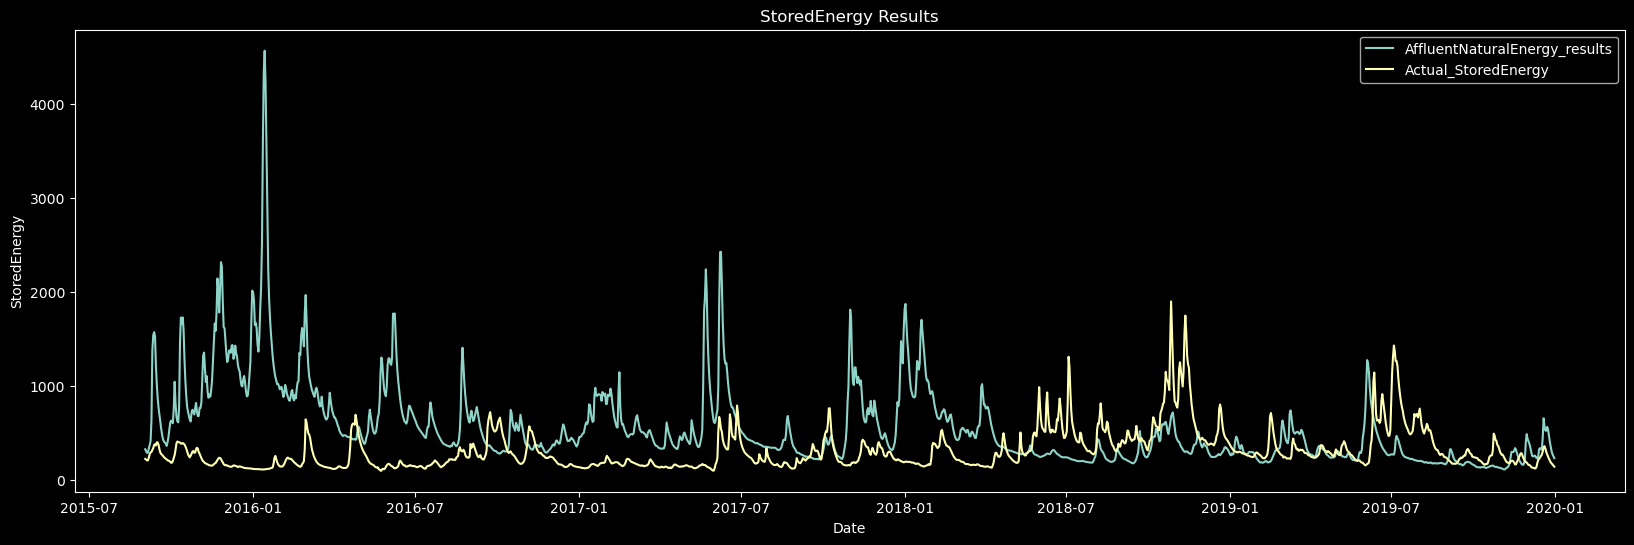

In [56]:
plt.figure(figsize=(20, 6))
plt.plot(sdf_forecasted_capivara.index, sdf_forecasted_capivara['AffluentNaturalEnergy_results'], label='AffluentNaturalEnergy_results')
plt.plot(sdf_forecasted_capivara.index, sdf_forecasted_capivara['Actual_AffluentNaturalEnergy'], label='Actual_StoredEnergy')
plt.xlabel('Date')
plt.ylabel('StoredEnergy')
plt.title('StoredEnergy Results')
plt.legend()
plt.show()

#### Chavantes 

In [57]:
#sdf_forecasted = sdf_forecasted.reset_index()
sdf_forecasted_chavantes['Date'] = (sdf_forecasted_chavantes.index)
sdf_forecasted_chavantes.set_index('Date', inplace=True)

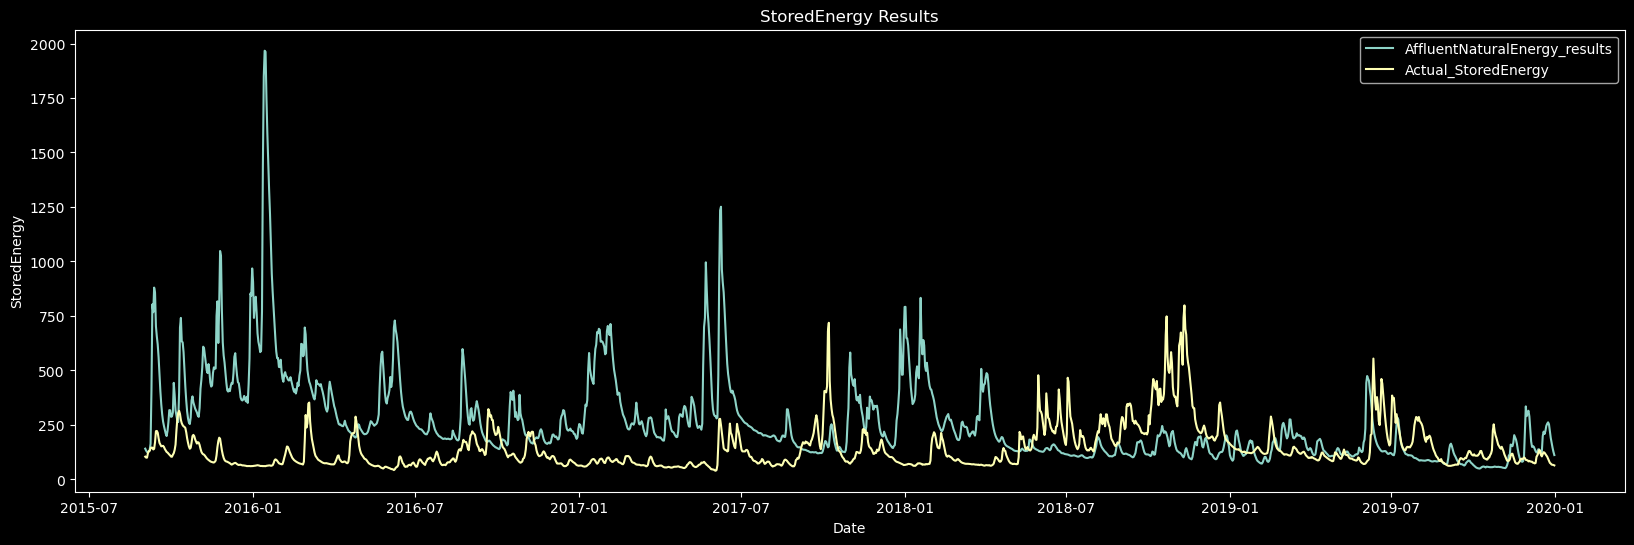

In [58]:
plt.figure(figsize=(20, 6))
plt.plot(sdf_forecasted_chavantes.index, sdf_forecasted_chavantes['AffluentNaturalEnergy_results'], label='AffluentNaturalEnergy_results')
plt.plot(sdf_forecasted_chavantes.index, sdf_forecasted_chavantes['Actual_AffluentNaturalEnergy'], label='Actual_StoredEnergy')
plt.xlabel('Date')
plt.ylabel('StoredEnergy')
plt.title('StoredEnergy Results')
plt.legend()
plt.show()

#### Jurumirim 

In [61]:
#sdf_forecasted = sdf_forecasted.reset_index()
sdf_forecasted_jurumirim['Date'] = (sdf_forecasted_jurumirim.index)
sdf_forecasted_jurumirim.set_index('Date', inplace=True)

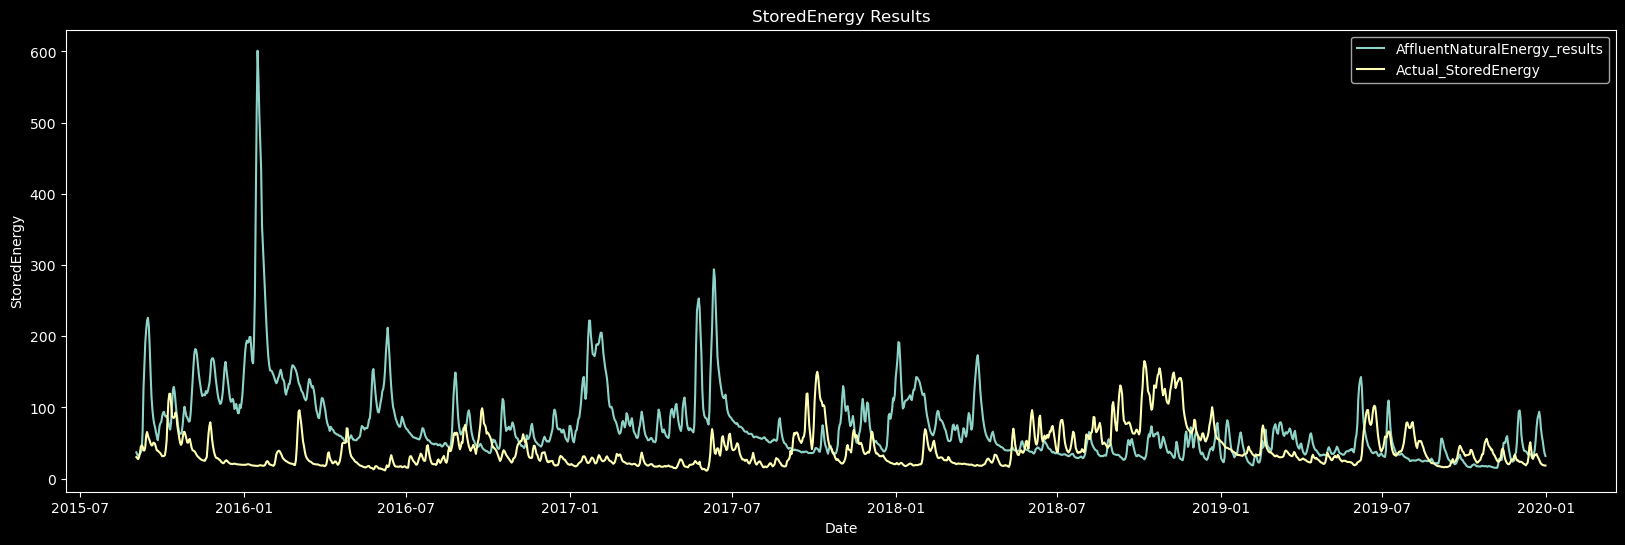

In [62]:
plt.figure(figsize=(20, 6))
plt.plot(sdf_forecasted_jurumirim.index, sdf_forecasted_jurumirim['AffluentNaturalEnergy_results'], label='AffluentNaturalEnergy_results')
plt.plot(sdf_forecasted_jurumirim.index, sdf_forecasted_jurumirim['Actual_AffluentNaturalEnergy'], label='Actual_StoredEnergy')
plt.xlabel('Date')
plt.ylabel('StoredEnergy')
plt.title('StoredEnergy Results')
plt.legend()
plt.show()